In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Input
from keras import applications
from keras.layers import AveragePooling2D, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation
from keras.optimizers import RMSprop
import numpy as np
import pandas as pd
from keras import layers

In [2]:
#parameters
classes = 12
batch_size=16
train_total = 3783
validation_total = 967

In [3]:
def conv_2d(input_tensor, filters, num_rows,num_cols, padding='same', strides=(1,1)):
    x = Conv2D(filters, (num_rows, num_cols), strides=strides,padding=padding,use_bias=False)(input_tensor)
    x = BatchNormalization(axis=3, scale=False)(x)
    x = Activation('relu')(x)
    return x
    

In [4]:
input_layer = Input((299, 299, 3))

In [5]:
x = conv_2d(input_layer, 32, 3, 3, strides=(2,2), padding='valid')
x = conv_2d(x, 32, 3, 3, padding='valid')
x = conv_2d(x, 64, 3, 3)
x = MaxPooling2D((3,3), strides=(2,2))(x)

x = conv_2d(x, 80, 1, 1, padding='valid')
x = conv_2d(x, 192, 3, 3, padding='valid')
x = MaxPooling2D((3,3), strides=(2,2))(x)

branch1x1 = conv_2d(x, 64, 1, 1)

branch5x5 = conv_2d(x, 48, 1, 1)
branch5x5 = conv_2d(branch5x5, 64, 5, 5)

branch3x3db1 = conv_2d(x, 64, 1, 1)
branch3x3db1 = conv_2d(branch3x3db1, 96, 3, 3)
branch3x3db1 = conv_2d(branch3x3db1, 96, 3, 3)

branch_pool = AveragePooling2D((3,3), strides=(1,1), padding='same')(x)
branch_pool = conv_2d(branch_pool, 32, 1, 1)
x = layers.concatenate(
                    [branch1x1, branch5x5, branch3x3db1, branch_pool], axis=3)

In [6]:
branch1x1 = conv_2d(x, 64, 1, 1)

branch5x5 = conv_2d(x, 48, 1, 1)
branch5x5 = conv_2d(branch5x5, 64, 5, 5)

branch3x3db1 = conv_2d(x, 64, 1, 1)
branch3x3db1 = conv_2d(branch3x3db1, 96, 3, 3)
branch3x3db1 = conv_2d(branch3x3db1, 96, 3, 3)

branch_pool = AveragePooling2D((3,3), strides=(1,1), padding='same')(x)
branch_pool = conv_2d(branch_pool, 64, 1, 1)
x = layers.concatenate(
                    [branch1x1, branch5x5, branch3x3db1, branch_pool], axis=3)

In [7]:
branch1x1 = conv_2d(x, 64, 1, 1)

branch5x5 = conv_2d(x, 48, 1, 1)
branch5x5 = conv_2d(branch5x5, 64, 5, 5)

branch3x3db1 = conv_2d(x, 64, 1, 1)
branch3x3db1 = conv_2d(branch3x3db1, 96, 3, 3)
branch3x3db1 = conv_2d(branch3x3db1, 96, 3, 3)

branch_pool = AveragePooling2D((3,3), strides=(1,1), padding='same')(x)
branch_pool = conv_2d(branch_pool, 64, 1, 1)
x = layers.concatenate(
                    [branch1x1, branch5x5, branch3x3db1, branch_pool], axis=3)

In [8]:
branch3x3 = conv_2d(x, 384, 3, 3, strides=(2,2), padding='valid')

branch3x3db1 = conv_2d(x, 64, 1, 1)
branch3x3db1 = conv_2d(branch3x3db1, 96, 3, 3)
branch3x3db1 = conv_2d(branch3x3db1, 96, 3, 3, strides=(2,2), padding='valid')

branch_pool = MaxPooling2D((3,3), strides=(2,2))(x)
branch_pool = conv_2d(branch_pool, 32, 1, 1)
x = layers.concatenate(
                    [branch3x3, branch3x3db1, branch_pool], axis=3)

In [9]:
branch1x1 = conv_2d(x, 192, 1, 1)

branch7x7 = conv_2d(x, 128, 1, 1)
branch7x7 = conv_2d(branch7x7, 128, 1, 7)
branch7x7 = conv_2d(branch7x7, 192, 7, 1)

branch7x7db1 = conv_2d(x, 128, 1, 1)
branch7x7db1 = conv_2d(branch7x7db1, 128, 7, 1)
branch7x7db1 = conv_2d(branch7x7db1, 128, 1, 7)
branch7x7db1 = conv_2d(branch7x7db1, 128, 7, 1)
branch7x7db1 = conv_2d(branch7x7db1, 192, 1, 7)

branch_pool = AveragePooling2D((3,3), strides=(1,1), padding='same')(x)
branch_pool = conv_2d(branch_pool, 192, 1, 1)
x = layers.concatenate(
                    [branch1x1, branch7x7, branch7x7db1, branch_pool], axis=3)

In [10]:
for i in range(2):
    branch1x1 = conv_2d(x, 192, 1, 1)

    branch7x7 = conv_2d(x, 160, 1, 1)
    branch7x7 = conv_2d(branch7x7, 160, 1, 7)
    branch7x7 = conv_2d(branch7x7, 192, 7, 1)

    branch7x7db1 = conv_2d(x, 160, 1, 1)
    branch7x7db1 = conv_2d(branch7x7db1, 160, 7, 1)
    branch7x7db1 = conv_2d(branch7x7db1, 160, 1, 7)
    branch7x7db1 = conv_2d(branch7x7db1, 160, 7, 1)
    branch7x7db1 = conv_2d(branch7x7db1, 192, 1, 7)

    branch_pool = AveragePooling2D((3,3), strides=(1,1), padding='same')(x)
    branch_pool = conv_2d(branch_pool, 192, 1, 1)
    x = layers.concatenate(
                    [branch1x1, branch7x7, branch7x7db1, branch_pool], axis=3)

In [11]:
branch1x1 = conv_2d(x, 192, 1, 1)

branch7x7 = conv_2d(x, 192, 1, 1)
branch7x7 = conv_2d(branch7x7, 192, 1, 7)
branch7x7 = conv_2d(branch7x7, 192, 7, 1)

branch7x7db1 = conv_2d(x, 192, 1, 1)
branch7x7db1 = conv_2d(branch7x7db1, 192, 7, 1)
branch7x7db1 = conv_2d(branch7x7db1, 192, 1, 7)
branch7x7db1 = conv_2d(branch7x7db1, 192, 7, 1)
branch7x7db1 = conv_2d(branch7x7db1, 192, 1, 7)

branch_pool = AveragePooling2D((3,3), strides=(1,1), padding='same')(x)
branch_pool = conv_2d(branch_pool, 192, 1, 1)
x = layers.concatenate(
                    [branch1x1, branch7x7, branch7x7db1, branch_pool], axis=3)

In [12]:
branch3x3 = conv_2d(x, 192, 1, 1)
branch3x3 = conv_2d(branch3x3, 320, 3, 3, strides=(2,2), padding='valid')

branch7x7x3 = conv_2d(x, 192, 1, 1)
branch7x7x3 = conv_2d(branch7x7x3, 192, 1, 7)
branch7x7x3 = conv_2d(branch7x7x3, 192, 7, 1)
branch7x7x3 = conv_2d(branch7x7x3, 192, 3, 3, strides=(2,2), padding='valid')

branch_pool = MaxPooling2D((3,3), strides=(2,2))(x)
branch_pool = conv_2d(branch_pool, 32, 1, 1)
x = layers.concatenate(
                    [branch3x3, branch7x7x3, branch_pool], axis=3)

In [13]:
for i in range(2):
    branch1x1 = conv_2d(x, 320, 1, 1)
    
    branch3x3 = conv_2d(x, 384, 1, 1)
    branch3x3_1 = conv_2d(branch3x3, 384, 1, 3)
    branch3x3_2 = conv_2d(branch3x3, 384, 3, 1)
    branch3x3 = layers.concatenate([branch3x3_1, branch3x3_2], axis=3)
    
    branch3x3db1 = conv_2d(x, 448, 1, 1)
    branch3x3db1 = conv_2d(branch3x3db1, 384, 3, 3)
    branch3x3db1_1 = conv_2d(branch3x3db1, 384, 1, 3)
    branch3x3db1_2 = conv_2d(branch3x3db1, 384, 3, 1)
    branch3x3db1 = layers.concatenate([branch3x3db1_1,branch3x3db1_2], axis=3)
    
    branch_pool = AveragePooling2D((3,3), strides=(1,1), padding='same')(x)
    branch_pool = conv_2d(branch_pool, 192, 1, 1)
    x = layers.concatenate([branch1x1, branch3x3, branch3x3db1, branch_pool],axis=3)

In [14]:
x = GlobalAveragePooling2D()(x)
x = Dense(classes, activation='softmax')(x)

In [15]:
model = Model(inputs=input_layer, outputs=x)

In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 149, 149, 32)  864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 149, 149, 32)  0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [17]:
len(model.layers)

319

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   rotation_range = 20,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='reflect',
                                   horizontal_flip=True,
                                   vertical_flip=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
                    'train',
                    target_size=(299,299),
                    batch_size=1,
                    class_mode='categorical',
                    shuffle=True
                    )
validation_generator = validation_datagen.flow_from_directory(
                        'validation',
                        target_size=(299,299),
                        batch_size=1,
                        class_mode='categorical')

Found 3820 images belonging to 12 classes.
Found 930 images belonging to 12 classes.


In [26]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

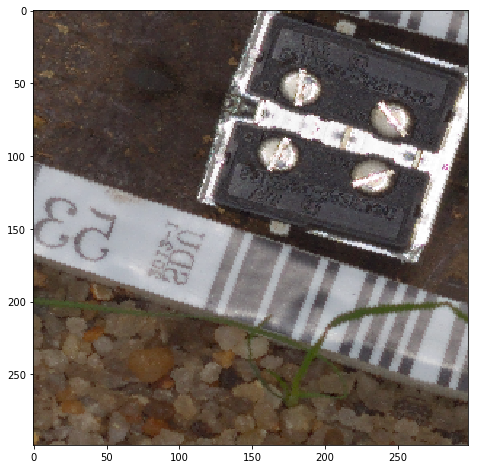

In [160]:
plt.figure(figsize=(8,8))
plt.imshow(train_generator.next()[0][0]);

In [34]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.000001),
             metrics=['accuracy'])

In [35]:
checkpointer = ModelCheckpoint(filepath='inception_from_scratch_save_best.hdf5', verbose=1, save_best_only=True, save_weights_only=True)


In [38]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch = int(np.ceil(train_total/batch_size)),
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps= int(np.ceil(validation_total/batch_size)),
                    verbose=2,
                    callbacks=[checkpointer])

Epoch 1/30
Epoch 00000: val_loss improved from inf to 0.34550, saving model to inception_from_scratch_save_best.hdf5
179s - loss: 0.5055 - acc: 0.8215 - val_loss: 0.3455 - val_acc: 0.8929
Epoch 2/30
Epoch 00001: val_loss improved from 0.34550 to 0.33032, saving model to inception_from_scratch_save_best.hdf5
176s - loss: 0.4853 - acc: 0.8309 - val_loss: 0.3303 - val_acc: 0.8971
Epoch 3/30
Epoch 00002: val_loss improved from 0.33032 to 0.32041, saving model to inception_from_scratch_save_best.hdf5
177s - loss: 0.5087 - acc: 0.8212 - val_loss: 0.3204 - val_acc: 0.8940
Epoch 4/30
Epoch 00003: val_loss did not improve
175s - loss: 0.5153 - acc: 0.8206 - val_loss: 0.3449 - val_acc: 0.8867
Epoch 5/30
Epoch 00004: val_loss did not improve
179s - loss: 0.4992 - acc: 0.8257 - val_loss: 0.3356 - val_acc: 0.8919
Epoch 6/30
Epoch 00005: val_loss did not improve
184s - loss: 0.4922 - acc: 0.8314 - val_loss: 0.3429 - val_acc: 0.8919
Epoch 7/30
Epoch 00006: val_loss did not improve
179s - loss: 0.4834

KeyboardInterrupt: 

In [37]:
model.load_weights('inception_from_scratch_save_best.hdf5')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
                    'test',
                    shuffle=False,
                    target_size=(299,299),
                    batch_size=batch_size,
                    class_mode=None)


In [ ]:
predictions = model.predict_generator(test_generator,int(np.ceil(794/batch_size)))
class_ids = {train_generator.class_indices[x]: x for x in train_generator.class_indices}
predicted_classes = [class_ids[x] for x in np.argmax(predictions, axis=1)]


In [ ]:
from os.path import basename
test_ids = [basename(x) for x in test_generator.filenames]
submission = pd.DataFrame({'file':test_ids,'species':predicted_classes})
submission.to_csv('submission_inception_from_scratch.csv', encoding="utf8", index=False)

In [ ]:
from IPython.display import FileLink
FileLink('submission_inception_from_scratch.csv')

In [ ]:
# PB LB: 0.92821